## Регуляризация в регрессии

Регуляризация — метод предотвращения переобучения путём штрафа за большие коэффициенты модели.

### Ridge Regression (L2-регуляризация)

Штраф: сумма квадратов весов  
$$
\min \left( \sum (y - \hat{y})^2 + \lambda \sum w_i^2 \right)
$$

Эффект:
- уменьшает веса
- **не** зануляет признаки
- даёт стабильную модель

### Lasso Regression (L1-регуляризация)

Штраф: сумма модулей весов  
$$
\min \left( \sum (y - \hat{y})^2 + \lambda \sum |w_i| \right)
$$

Эффект:
- может занулить коэффициенты
- делает feature selection

### Когда что использовать?

| Метод | Использовать когда |
|-------|-------------------|
| **Ridge (L2)** | много признаков, нужны все |
| **Lasso (L1)** | надо выбрать важные признаки |
| **ElasticNet** | смесь L1 и L2, полезно при коррелированных признаках |


## Регуляризация в полиномиальной регрессии
### Ridge (L2), Lasso (L1), ElasticNet (L1+L2)

Цель: показать влияние регуляризации на модель высокой степени и предотвратить переобучение.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, root_mean_squared_error


In [2]:
# Генерация данных (кубическая зависимость)
np.random.seed(42)
n = 120
X = np.linspace(-4, 6, n).reshape(-1, 1)
noise = np.random.normal(0, 6, size=n)
y = 0.5*X[:,0]**3 - 3*X[:,0]**2 + 2*X[:,0] + noise

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [3]:
def train_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print(f"R² = {r2_score(y_test, y_pred):.4f}")
    print(f"RMSE = {root_mean_squared_error(y_test, y_pred):.4f}\n")
    return model


In [4]:
degree = 10  # высокая степень — чтобы показать эффект регуляризации

ridge = Pipeline([
    ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
    ("scale", StandardScaler()),
    ("ridge", Ridge(alpha=1.0))
])

lasso = Pipeline([
    ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
    ("scale", StandardScaler()),
    ("lasso", Lasso(alpha=0.05, max_iter=100000))
])

elastic = Pipeline([
    ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
    ("scale", StandardScaler()),
    ("elastic", ElasticNet(alpha=0.05, l1_ratio=0.3, max_iter=100000))
])

ridge = train_model(ridge, "Ridge (L2)")
lasso = train_model(lasso, "Lasso (L1)")
elastic = train_model(elastic, "ElasticNet (L1+L2)")




=== Ridge (L2) ===
R² = 0.9472
RMSE = 5.6133

=== Lasso (L1) ===
R² = 0.9528
RMSE = 5.3109

=== ElasticNet (L1+L2) ===
R² = 0.9290
RMSE = 6.5110



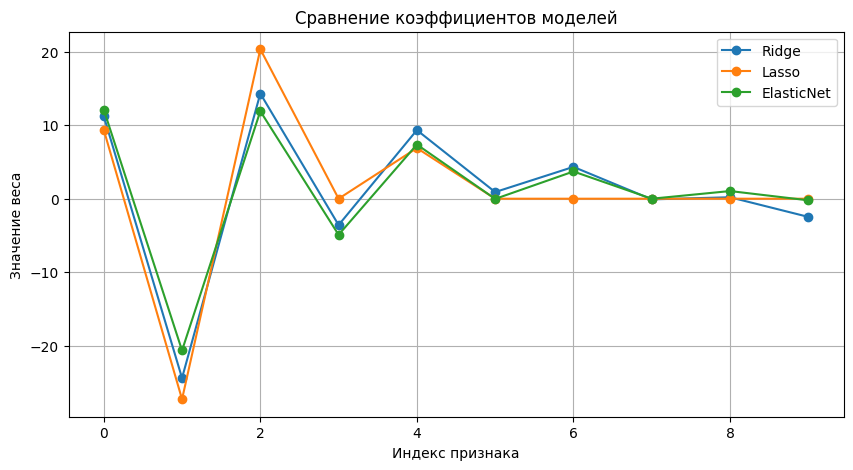

In [5]:
models = {
    "Ridge": ridge.named_steps["ridge"].coef_,
    "Lasso": lasso.named_steps["lasso"].coef_,
    "ElasticNet": elastic.named_steps["elastic"].coef_
}

plt.figure(figsize=(10,5))
for name, coefs in models.items():
    plt.plot(coefs, marker="o", label=name)

plt.title("Сравнение коэффициентов моделей")
plt.xlabel("Индекс признака")
plt.ylabel("Значение веса")
plt.legend()
plt.grid(True)
plt.show()


### Вывод

| Метод | Поведение | Применение |
|------|-----------|------------|
| **Ridge (L2)** | Сглаживает, снижает переобучение | Если признаки важны все |
| **Lasso (L1)** | Обнуляет веса, выбирает признаки | Feature selection |
| **ElasticNet** | Баланс L1 и L2, стабильнее Lasso | Когда признаки коррелированы |

При высокой степени полинома (`degree=10`) регуляризация критически важна —
без неё модель переобучается.
